### Edge Detetcion

Edges indicat eobject outlines and play an important role in visual **perception**. Edge are based on local gradients of luminance and therefore have
* magnitude
* orientation

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

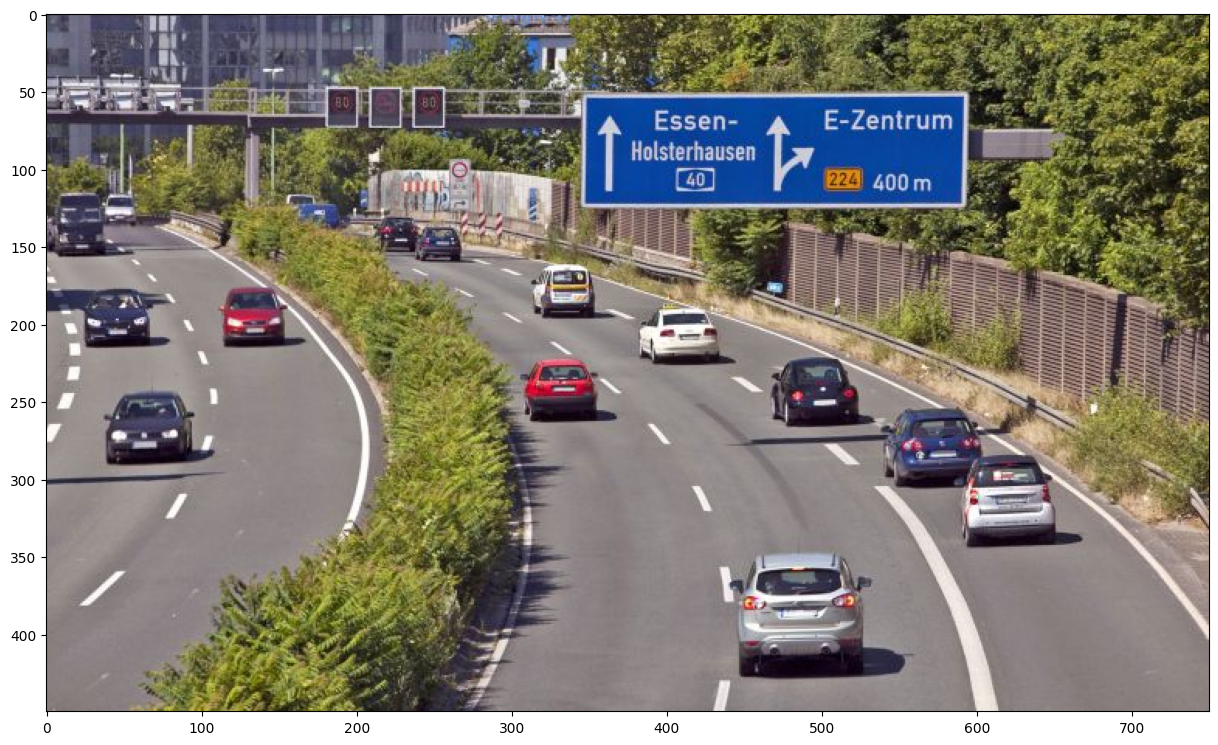

In [33]:
img = cv2.imread('data/autobahn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: title={'center': 'Vertical gradient'}>,
 Text(0.5, 1.0, 'Vertical gradient'))

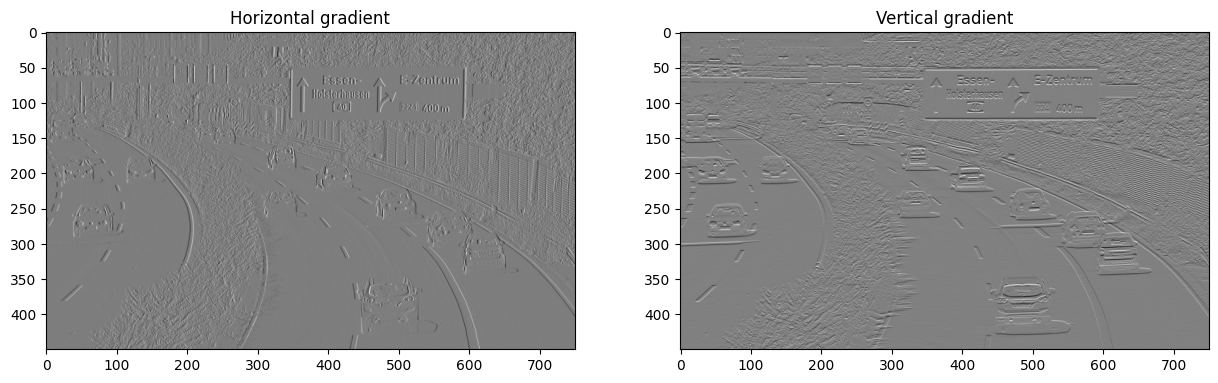

In [44]:
# Set up kernels
kernel_hor = np.array([[1, -1]])
kernel_ver = np.array([[1], [-1]])

# Prepare gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = gray/255

# Convolve discrete gradient kernels with the luminance channel
grad_hor = cv2.filter2D(gray, ddepth=-1, kernel=kernel_hor)
grad_ver = cv2.filter2D(gray, ddepth=-1, kernel=kernel_ver)

plt.subplot(121), plt.imshow(grad_hor, cmap='gray'), plt.title('Horizontal gradient')
plt.subplot(122), plt.imshow(grad_ver, cmap='gray'), plt.title('Vertical gradient')

The problem with simple discrete gradients is that they are very sensitive to noise.

(<Axes: title={'center': 'Vertical gradient'}>,
 Text(0.5, 1.0, 'Vertical gradient'))

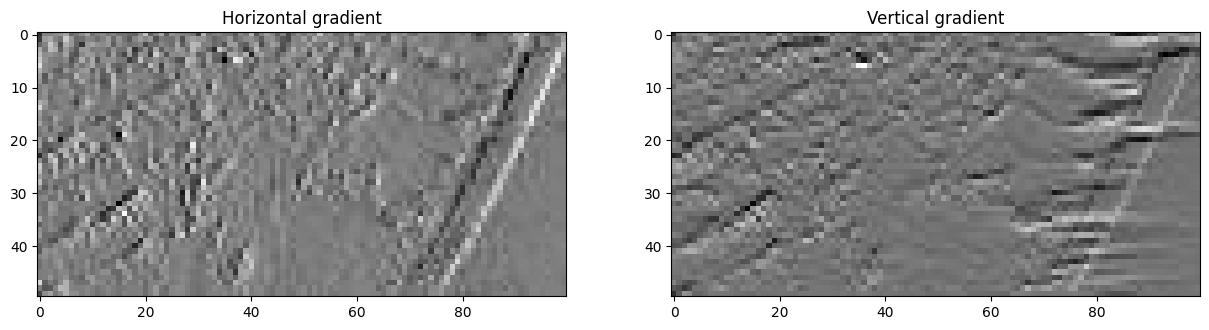

In [35]:
plt.subplot(121), plt.imshow(grad_hor[400:, 200:300], cmap='gray'), plt.title('Horizontal gradient')
plt.subplot(122), plt.imshow(grad_ver[400:, 200:300], cmap='gray'), plt.title('Vertical gradient')

### Averaging Filters
Gradient filters can be convolved with averaging filters to get a less noisy gradient map.

In [36]:
# Set up gradient kernels
Gh = np.array([[1, -1]])
Gv = np.array([[1], [-1]])

# Set up averaging kernels
Ah = 0.5 * np.array([[1, 1]])
Av = 0.5 * np.array([[1], [1]])

# Build separable averaging gradient kernels
Hh = np.matmul(Av, Gh)
Hv = np.matmul(Gv, Ah)

print('Horizontal filter \n', Hh)
print(' ')
print('Vertical filter \n', Hv)

Horizontal filter 
 [[ 0.5 -0.5]
 [ 0.5 -0.5]]
 
Vertical filter 
 [[ 0.5  0.5]
 [-0.5 -0.5]]


(<Axes: title={'center': 'Vertical gradient'}>,
 Text(0.5, 1.0, 'Vertical gradient'))

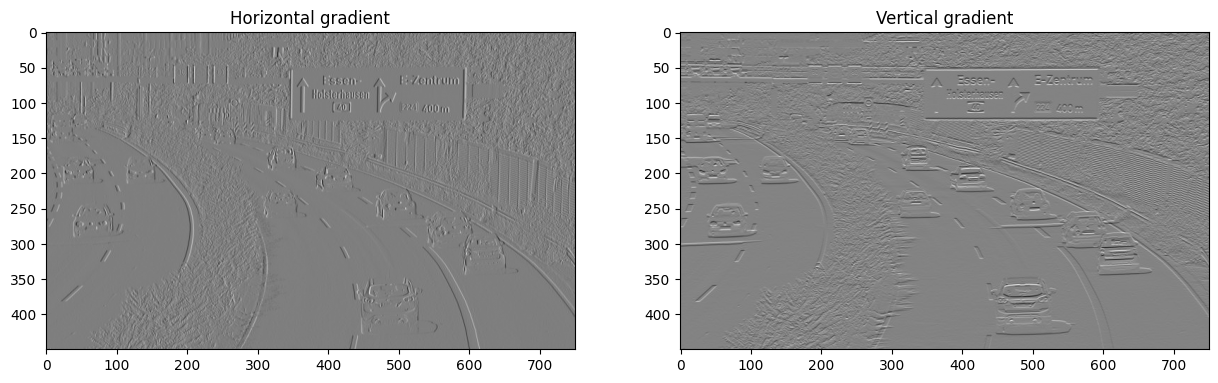

In [37]:
grad_avg_hor = cv2.filter2D(gray, ddepth=-1, kernel=Hh)
grad_avg_ver = cv2.filter2D(gray, ddepth=-1, kernel=Hv)

plt.subplot(121), plt.imshow(grad_avg_hor, cmap='gray'), plt.title('Horizontal gradient')
plt.subplot(122), plt.imshow(grad_avg_ver, cmap='gray'), plt.title('Vertical gradient')

-0.40392156862745093 0.411764705882353
-0.3549019607843137 0.32549019607843144


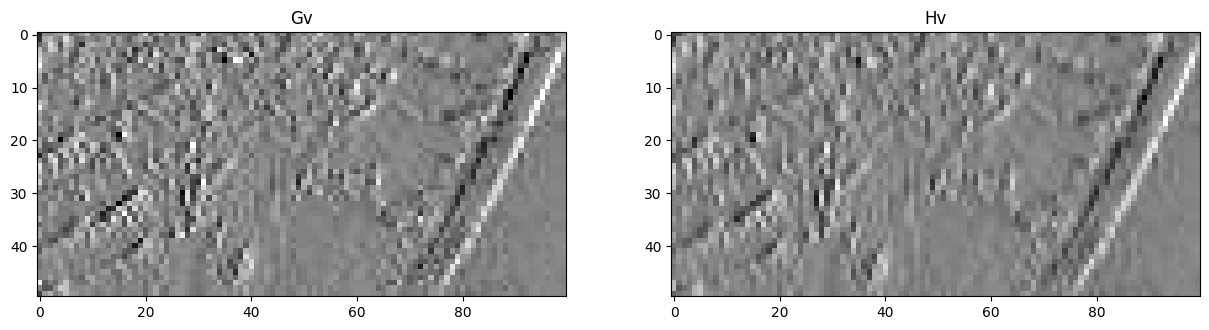

In [38]:
block_hor = grad_hor[400:, 200:300]
block_avg_hor = grad_avg_hor[400:, 200:300]

vmin = max(np.min(block_hor), np.min(block_avg_hor))
vmax = min(np.max(block_hor), np.max(block_avg_hor))

plt.subplot(121), plt.imshow(block_hor, cmap='gray', vmin=vmin, vmax=vmax), plt.title('Gv')
plt.subplot(122), plt.imshow(block_avg_hor, cmap='gray', vmin=vmin, vmax=vmax), plt.title('Hv')

print(np.min(block_hor), np.max(block_hor))
print(np.min(block_avg_hor), np.max(block_avg_hor))

-0.47843137254901963 0.584313725490196
-0.4450980392156863 0.5588235294117647


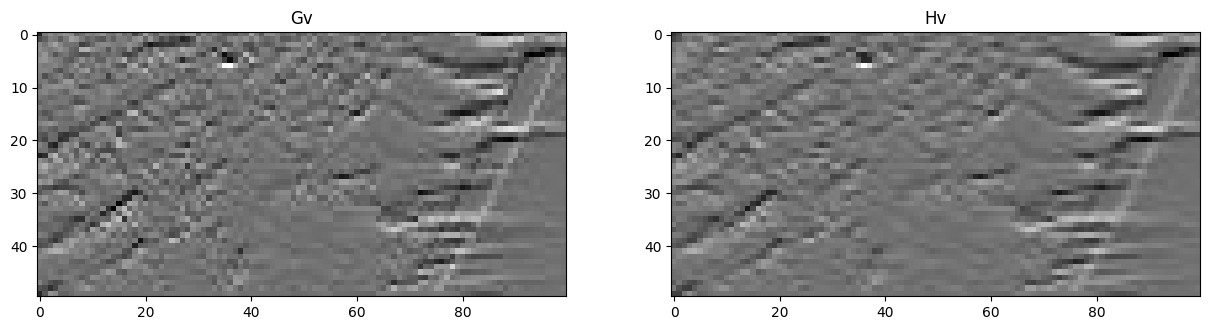

In [39]:
block_ver = grad_ver[400:, 200:300]
block_avg_ver = grad_avg_ver[400:, 200:300]

vmin = max(np.min(block_ver), np.min(block_avg_ver))
vmax = min(np.max(block_ver), np.max(block_avg_ver))

plt.subplot(121), plt.imshow(block_ver, cmap='gray', vmin=vmin, vmax=vmax), plt.title('Gv')
plt.subplot(122), plt.imshow(block_avg_ver, cmap='gray', vmin=vmin, vmax=vmax), plt.title('Hv')

print(np.min(block_ver), np.max(block_ver))
print(np.min(block_avg_ver), np.max(block_avg_ver))

### Sobel Edge Detector
Sober edge detector is a symmetric rgadient filter with weighted averaging. It is one of the most popular and effective gradient filters.

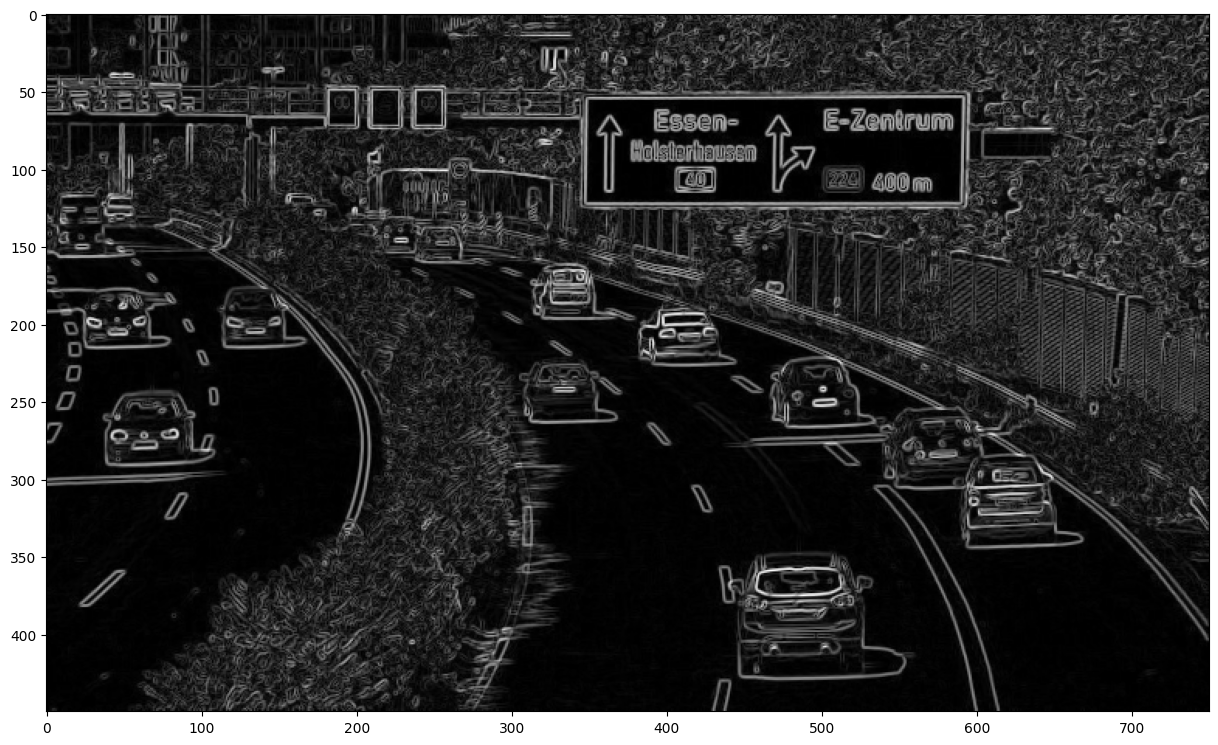

In [40]:
grad_x = cv2.Sobel(gray, ddepth=-1, dx=1, dy=0)
grad_y = cv2.Sobel(gray, ddepth=-1, dx=0, dy=1)

# Compute magnitude
grad = np.sqrt(grad_x**2 + grad_y**2)
grad = grad/np.max(grad)

plt.imshow(grad, cmap='gray')


### Canny Edge Detector
Produces smooth edges by applying Gaussian prefiltering. It also applies double thresholding via hystheresis. The edges are thinned using non-maximum-suppresion.

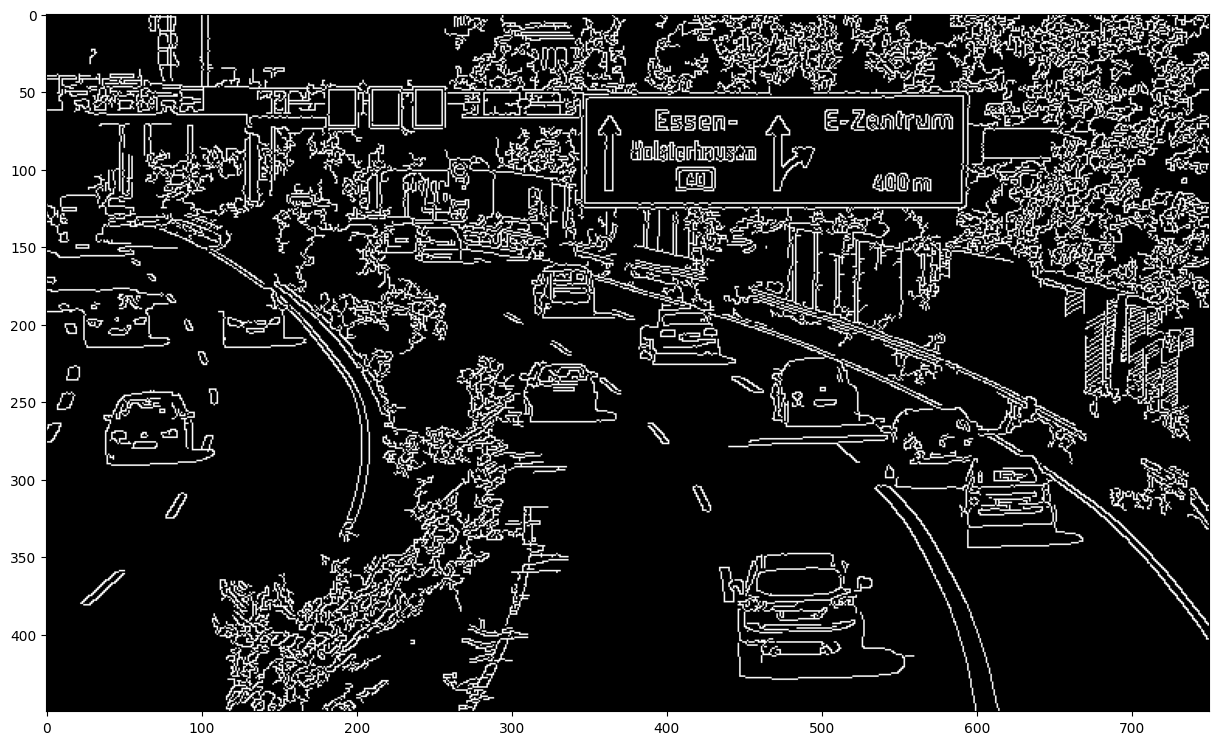

In [41]:
# OpenCV implementation of Canny only accepts uint8 images
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, threshold1=100, threshold2=550)
plt.imshow(edges, cmap='gray')

You can see the NMS edge thinning workig in the following comparison.

NameError: name 'sobel' is not defined

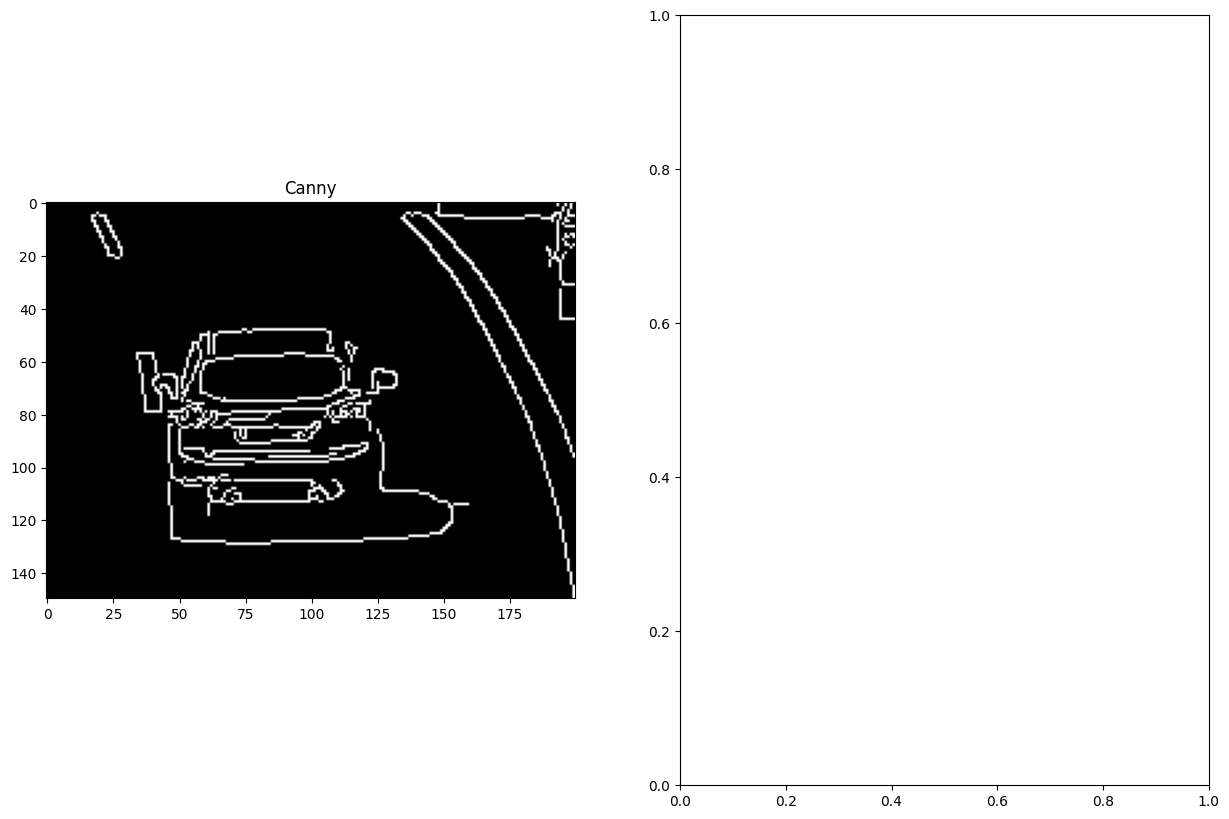

In [42]:
plt.subplot(121), plt.imshow(edges[300:, 400:600], cmap='gray'), plt.title('Canny')
plt.subplot(122), plt.imshow(sobel[300:, 400:600] > 0.3, cmap='gray'), plt.title('Sobel')